<a href="https://colab.research.google.com/github/greymattar/ECG_WGAN_AugmentationClassification/blob/main/ECG_GAN_main_test4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df =pd.read_json("/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main/record_X_y_adapt_win_bef075_aft075_Normalized.json")
print (df)

109494 ta beat , ar [] er vetorer value gulu sample values . segmentation korar por prottek ta value ja signal ta theke paisi


the data is resampled to 256 samples per beat using
scipy.signal.resample.[The MIT-BIH Arrhythmia Database contains electrocardiogram (ECG) signals that were recorded at a sampling frequency of 360 Hz]

In [ ]:
!pip install wfdb

In [ ]:
pip install similaritymeasures


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for similaritymeasures: filename=similaritymeasures-0.7.0-py3-none-any.whl size=15452 sha256=b502c40b9255790ecbc9b7f72490ba80bea411731ccd9ae13419c10999002d1e
  Stored in directory: /root/.cache/pip/wheels/24/a6/80/6f1676caf08ab1b69d74c8a727c96fdd3903d891672b415008
Successfully built similaritymeasures


In [ ]:
pip install dtaidistance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 24.9 MB/s eta 0:00:00


In [ ]:
"""
calculates average DTW distance of beats (generated or real)
from a visually selected template
"""
import json
import os
import sys
from datetime import datetime
from statistics import mean

import numpy as np
from similaritymeasures import frechet_dist as frechet
from dtaidistance.dtw import distance as dtw
from scipy.spatial.distance import euclidean
#from scipy.spatial.distance import frechet_distance


start_time = datetime.now()
print(("\n" + "*" * 61 + "\n\t\t\t\t\tstart time  {0:02d}:{1:02d}:{2:02.0f}\n" + "*" * 61).format(
    start_time.hour, start_time.minute, start_time.second))

aug_key = "augmented"
# aug_key = ""

#cond_key = "uncond"
cond_key = "cond"

#screen_key = "screened"
screen_key = "not_screened"

drive = ""
#myPath_base = os.path.join(drive, "")
#for Gan beats
d_set="MIT_BIH"
myPath_base = os.path.join(drive,"PycharmProjects\\paper2_gen_data\\", d_set, "multiclass", "01_{}\\{}".format(cond_key, screen_key))
#for real beats
#myPath_base=""
aux_path_2 = ""
# aux_path_3 ="paper3_data\\gb_{}\\gb_{}_{}".format(cond_key, screen_key)
# f_name_3 = "data_gb_dict_{}_{}.json"

# recall: classes2keep = ['N','P', 'A', 'L', 'R', 'f', 'j','F','a']


cl = 'j'
print('class: {}, {}, {}'.format(cl, cond_key, screen_key))
#print('real data, class: {}'.format(cl))
f_name_2 = "gb_{}_{}_{}.json".format(cl, cond_key, screen_key)

myPath_template = os.path.join(drive, "PyCharmProjects\paper2_data/MIT_BIH/templates")
f_name_template = "templates_{}_.json".format(cl)
#PyCharmProjects\paper2_data/MIT_BIH/templates/templates_A_.json

myPath_read_gb = os.path.join(myPath_base, aux_path_2)
#myPath_read_rl = os.path.join(os.path.join(drive, "PyCharmProjects\paper2_data/MIT_BIH/data_rl"))

#with open(os.path.join(myPath_read_rl, "data_rl_dict.json"), 'r') as f:
    #data_rl_dict = json.load(f)

with open(os.path.join(myPath_read_gb, f_name_2), 'r') as f:
    beats_all = json.load(f)

beats = beats_all[:5000]
with open(os.path.join(myPath_template, f_name_template), 'r') as f:
    templates = json.load(f)

template_num = 1
template = templates[template_num]
#19 for a
'''
if len(data_rl_dict[cl]) <= 5000:
    beats = data_rl_dict[cl]
else:
    beats = data_rl_dict[cl][:5000]

'''

dist_dtw = []
dist_frechet = []

for idx, beat in enumerate(beats):
    dist_dtw.append(dtw(beat, template))
    #dist_frechet.append(frechet(beat, template))
    #beat_arr = np.array(beat)
    #template_arr = np.array(template)
    #dist_frechet.append(frechet(beat_arr[:, np.newaxis], template_arr[:, np.newaxis]))

dist_dtw_mean = mean(dist_dtw)
#dist_frechet_mean = mean(dist_frechet)
display(dist_dtw_mean)

'''
original_stdout = sys.stdout
# %%%%%%%%%%%%%%%%%%%%%%% begin: write to file (genbeats) %%%%%%%%%%%%%%%%%%%%%%%%%%%%

with open(os.path.join("PyCharmProjects\paper2_data/final_report_files", 'dist_{}_{}.txt'.format(cond_key, screen_key)), 'a') as f:
    sys.stdout = f
    print('\nNumber of beats in the class {}: {}\n'.format(cl, len(beats)))
    print('Average DTW distance of genbeats ({}, {}) from template # {}:'.format(cond_key, screen_key, template_num))
    print('\n\tcl: {}\n\tave DTW: {:5.3f}'.format(cl, dist_dtw_mean))
    print('%' * 60)

    #print('\nAverage Frechet distance of genbeats ({}, {}:)'.format(cond_key, screen_key))
    #print('\t ave Frechet: {:5.3f}'.format(dist_frechet_mean))
    #print('Average Euclidean distance of genbeats ({}, {}:)'.format(cond_key, screen_key))
    #print('\t ave Euclidean: {:5.3f}'.format(dist_dtw_mean))
'''

# %%%%%%%%%%%%%%%%%%%%%%% end: write to file (genbeats) %%%%%%%%%%%%%%%%%%%%%%%%%%%%


# %%%%%%%%%%%%%%%%%%%%%%% begin: write to file (data_rl_dict) %%%%%%%%%%%%%%%%%%%%%%%%%%
'''
with open(os.path.join(myPath_base, "PyCharmProjects\paper2_data/final_report_files", "dist_real_beats.txt"), 'a') as f:
    sys.stdout = f
    print('\nNumber of beats in the class {}: {}\n'.format(cl, len(beats)))
    print('Average DTW distance of real beats from template # {}:'.format(template_num))
    print('\n\tcl: {}\n\tave DTW: {:5.3f}'.format(cl, dist_dtw_mean))
    print('%' * 60)
    #print('Average Frechet distance of real beats from template # {}:'.format(template_num))
    #print('\t ave Frechet: {:5.3f}'.format(dist_frechet_mean))


# %%%%%%%%%%%%%%%%%%%%%%% end: write to file (data_rl_dict) %%%%%%%%%%%%%%%%%%%%%%%%%%%%

sys.stdout = original_stdout

finish_time = datetime.now()
print(("\n\n\n" + "finish time = {0:02d}:{1:02d}:{2:02.0f}").format(
    finish_time.hour, finish_time.minute, finish_time.second))

laps = finish_time - start_time
tot_sec = laps.total_seconds()
h = int(tot_sec // 3600)
m = int((tot_sec % 3600) // 60)
s = int(tot_sec - (h * 3600 + m * 60))

print("total elapsed time = {:02d}:{:02d}:{:02d}".format(h, m, s))

a = 0

#/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main/PyCharmProjects\paper2_data/final_report_files/dist_real_beats.txt
'''


*************************************************************
					start time  11:27:01
*************************************************************
class: j, cond, not_screened


3.721884944181147

'\nwith open(os.path.join(myPath_base, "PyCharmProjects\\paper2_data/final_report_files", "dist_real_beats.txt"), \'a\') as f:\n    sys.stdout = f\n    print(\'\nNumber of beats in the class {}: {}\n\'.format(cl, len(beats)))\n    print(\'Average DTW distance of real beats from template # {}:\'.format(template_num))\n    print(\'\n\tcl: {}\n\tave DTW: {:5.3f}\'.format(cl, dist_dtw_mean))\n    print(\'%\' * 60)\n    #print(\'Average Frechet distance of real beats from template # {}:\'.format(template_num))\n    #print(\'\t ave Frechet: {:5.3f}\'.format(dist_frechet_mean))\n\n\n# %%%%%%%%%%%%%%%%%%%%%%% end: write to file (data_rl_dict) %%%%%%%%%%%%%%%%%%%%%%%%%%%%\n\nsys.stdout = original_stdout\n\nfinish_time = datetime.now()\nprint(("\n\n\n" + "finish time = {0:02d}:{1:02d}:{2:02.0f}").format(\n    finish_time.hour, finish_time.minute, finish_time.second))\n\nlaps = finish_time - start_time\ntot_sec = laps.total_seconds()\nh = int(tot_sec // 3600)\nm = int((tot_sec % 3600) // 60)\ns =

In [ ]:
import sys
import os
#sys.path.append('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main')
os.chdir('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main')
print(os.getcwd())
#/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main/ekg_class.py


/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main



**************************************************
		start time:      18:40:12
**************************************************
train: Counter({3: 7267, 4: 6533, 1: 6325, 2: 2291, 0: 900, 5: 883, 7: 722, 6: 206, 8: 135})
test: Counter({3: 807, 4: 725, 1: 702, 2: 254, 0: 99, 5: 98, 7: 80, 6: 22, 8: 14})
09 - 18:41:22      Epoch [  0 /  40]      Batch    0/ 1578                      Loss D: -1.9599,	loss G: 1.6110
09 - 18:44:44      Epoch [  0 /  40]      Batch 1000/ 1578                      Loss D: -2.1703,	loss G: 2.7267
09 - 18:46:42      Epoch [  1 /  40]      Batch    0/ 1578                      Loss D: -2.0593,	loss G: 3.4691
09 - 18:50:02      Epoch [  1 /  40]      Batch 1000/ 1578                      Loss D: -1.4314,	loss G: 3.6190
09 - 18:52:00      Epoch [  2 /  40]      Batch    0/ 1578                      Loss D: -1.4984,	loss G: 1.8728
09 - 18:55:21      Epoch [  2 /  40]      Batch 1000/ 1578                      Loss D: -1.7784,	loss G: 1.9819
09 - 18:57:21      Ep

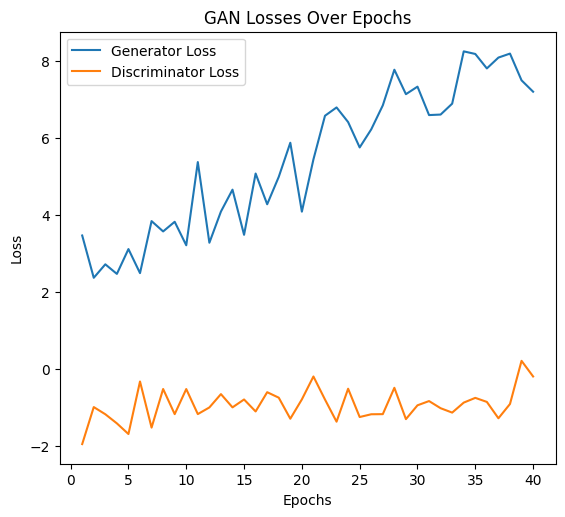


total elapsed time 03:36:3.32


'\nCodes for:\nYT, "Pytorch Conditional GAN Tutorial" by Aladdin Persson\n\nhttps://www.youtube.com/watch?v=Hp-jWm2SzR8\n\n\n'

In [ ]:
"""
/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main/record_X_y_adapt_win_bef075_aft075_Normalized.json
"""
import copy
import csv
import datetime
import json
import os
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import torch

import torch.optim as optim

import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

import sys
#sys.path.append('/content/gdrive/MyDrive/Augmentation-of-ECG-Training-Dataset-with-CGAN-main')

from ekg_class import dicts
from model_ac_wgan_gp_ecg import Disc_ac_wgan_gp_1d, Gen_ac_wgan_gp_1d, initialize_weights_1d
from utils import gradient_penalty, normalize, grid_plot_save, grid_plot

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

num2descr, letter2num, letter2descr, num2letter = dicts()
start_time = datetime.datetime.now()
print(("\n" + "*" * 50 + "\n\t\tstart time:      {0:02d}:{1:02d}:{2:02.0f}\n" + "*" * 50).format(
    start_time.hour, start_time.minute, start_time.second))

#drive = "F:"
drive = ""
myPath_base = os.path.join(drive, "")
myPath_dataset = os.path.join(myPath_base, "")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dry_run = False
if dry_run:
    NUM_EPOCHS = 1
else:
    NUM_EPOCHS = 40
BATCH_SIZE = 16
CHANNELS_IMG = 1
CRITIC_ITERATIONS = 5
FEATURES_DISC = 64
FEATURES_GEN = 64
GEN_EMBEDDING = 100
LAMBDA_GP = 10
LEARNING_RATE = 1e-4
Z_DIM = 100

tr_ts_ratio = 0.9     # "training set / test set" split ratio
len_ratio = 1     # to study the effect of support set number of samples (shorter train sets)
if '.' in str(len_ratio):
    len_ratio_str = str(len_ratio).replace('.', "")
else:
    len_ratio_str = str(len_ratio)

# transforms = transforms.Compose(
#    [
#        transforms.Resize(IMG_SIZE),
#        transforms.ToTensor(),
#        transforms.Normalize(
#            [0.5 for _ in range(CHANNELS_IMG)], [0.5 for _ in range(CHANNELS_IMG)]),
#    ]
# )


with open(os.path.join(myPath_dataset, "record_X_y_adapt_win_bef075_aft075_Normalized.json"), "r") as f:
    data = json.load(f)

stats_all_classes = Counter(np.asarray(data, dtype=object)[:, 2])

all_classes = ['/', 'A', 'E', 'F', 'J', 'L', 'N', 'Q', 'R', 'S', 'V', 'a', 'e', 'f', 'j']
all_classes_folder = ['P', 'A', 'E', 'F', 'J', 'L', 'N', 'Q', 'R', 'S', 'V', 'a', 'e', 'f', 'j']

all_classes.remove('Q')
all_classes.remove('S')
# all_classes.remove('V')      # why remove this? plots show no-uniform pattern

# %%%%%%%%%%%%%%%%%    begin classes statistics      %%%%%%%%%%%%%%%%%%
"""
stats_all_classes =
        {
        'N': 75052,   'L': 8075,  'R': 7259,  'V': 7130,
        '/': 7028,    'A': 2546,  'f': 982,   'F': 803,
        'j': 229,     'a': 150,   'E': 106,   'J': 83,
        'Q': 33,      'e': 16,    'S': 2
        }
P: Paced beat
A: Atrial Premature contraction
E: Ventricular Escape beat
F: Fusion of Ventricular and Normal beat
J: Nodal (junctional) Premature Beat
L: Left bundle branch block beat
N: Normal beat
Q: Unclassifiable beat
R: Right bundle branch block beat
S: Premature or ectopic supraventricular beat
V: Premature Ventricular Contraction
a: Aberrated Atrial Premature beat
e: Atrial escape beat
f: Fusion of paced and normal beat
j: Nodal (junctional) escape beat
"""
# %%%%%%%%%%%%%%%%%    end classes statistics    %%%%%%%%%%%%%%%%%%%

# %%%%%%%%%%%%%%%%       begin MIT-BIH Dataset      %%%%%%%%%%%%%%%%%%%%%%%%%%%%

d_set = "MIT_BIH"
# Note: '/' and 'P' are the same
#classes2keep = ['/', 'A', 'L', 'N', 'R', 'f', 'j']
#classes2keep_folder = ['P', 'A', 'L', 'N', 'R', 'f', 'j']
classes2keep = ['N','/', 'A', 'L', 'R', 'f', 'j','F','a']
classes2keep_folder = ['N','P', 'A', 'L','R', 'f', 'j','F','a']

# d_set = "ECG5000\\"
# classes2keep = [1, 2, 3, 4, 5]

myPath_save = os.path.join(myPath_base, "PycharmProjects\\paper2_gen_data\\", d_set, "multiclass",
                            "genbeats_ac_wgan_gp_cl_{}_len_ratio_{}".format(classes2keep_folder, len_ratio_str))
os.makedirs(myPath_save, exist_ok=True)

NUM_CLASSES = len(classes2keep)
IMG_SIZE = 256

with open(os.path.join(myPath_dataset, "record_X_y_adapt_win_bef075_aft075_Normalized.json"), "r") as f:
    data = json.load(f)

stats_all_classes = Counter(np.asarray(data, dtype=object)[:, 2])

# create dictionary of data to be kept
vals = []
for idx in range(len(classes2keep)):
    vals.append([])

data2keep_dict = dict(zip(classes2keep, vals))
data_train_dict = copy.deepcopy(data2keep_dict)
data_test_dict = copy.deepcopy(data2keep_dict)
'''
for item in data:
    if item[2] in classes2keep:
        data2keep_dict[item[2]].append(item[1])
del data
'''
count_N = 0  # Initialize counter for class 'N'

for item in data:
    if item[2] == 'N' and count_N < 1000:  # Add condition to limit 'N' data to 4000
        data2keep_dict[item[2]].append(item[1])
        count_N += 1
    elif item[2] != 'N' and item[2] in classes2keep:  # Add data of other classes
        data2keep_dict[item[2]].append(item[1])
del data

if '/' in classes2keep:
    temp = data2keep_dict['/']
    data2keep_dict.pop('/')
    data2keep_dict['P'] = temp

# randomly splitting the dataset into train and test sets
for key in classes2keep_folder:
    val_len = len(data2keep_dict[key])
    idx_train = torch.randperm(val_len)[:int(tr_ts_ratio * val_len)]
    idx_test = torch.randperm(val_len)[int(tr_ts_ratio * val_len)+1:]
    data_train_dict[key] = [data2keep_dict[key][idx] for idx in idx_train]
    data_test_dict[key] = [data2keep_dict[key][idx] for idx in idx_test]


# plot samples of beats in classes2keep
'''
for cl in classes2keep_folder:
    fig, axes = plt.subplots(nrows=3, ncols=3)
    fig.suptitle("Class {} ({}: {}), count:{}".format(classes2keep_folder.index(cl), cl, letter2descr[cl],
                                                      len(data2keep_dict[cl])))

    count = 0
    for i in range(3):
        for j in range(3):
            count += 1
            if count >= len(data2keep_dict[cl]):
                continue
            axes[i][j].plot(data2keep_dict[cl][count])
            axes[i][j].grid()
    # plt.savefig(os.path.join(myPath_save, "00_sample_cl_{}".format(classes2keep_folder.index(cl))))

plt.close("all")
'''
a = 0
# %%%%%%%%%%%%%%%%%%%%%%%%% begin save templates %%%%%%%%%%%%%%%%%%%%%%%
"""
# recall: classes2keep = ['N', 'L', 'R', 'V', 'P', 'A']
cl = "V"
path_class = os.path.join(my_path_base, "MIT_BIH")
template_folder = "templates"
f_name = "template_{}_revB.json".format(cl)
num_templates = 50

templates = data_train_dict[cl][:num_templates]
os.makedirs(os.path.join(path_class, template_folder), exist_ok=True)
with open((os.path.join(path_class, template_folder, f_name)), "w") as f:
    json.dump(templates, f)
a = 0
"""
# %%%%%%%%%%%%%%%%%%%%%%%%% end save templates %%%%%%%%%%%%%%%%%%%%%%%%%


'''
X = []
y = []
for item in data:
    if item[2] in classes2keep:
        X.append(item[1])
        idx = classes2keep.index(item[2])
        y.append(idx)
stats_y = Counter(y)
'''

# %%%%%%%%%%%%%%%%%    begin build X, y (training and test sets)    %%%%%%%%%%%%%%%%%%%%
X_train = []
y_train = []
# data_train_dict contains all the training data
# X_train contains only a portion of training data (len_ratio), to study of size of training set on
#           classification metrics

a = 0
for key in classes2keep_folder:
    temp = data_train_dict[key]
    length = int(len_ratio*len(temp))
    X_train.extend(temp[:length])
    idx = [classes2keep_folder.index(key)] * length
    # print('key {}, idx {}'.format(key, idx))
    y_train.extend(idx)

X_test = []
y_test = []
for key in classes2keep_folder:
    X_test.extend(data_test_dict[key][:])
    idx = [classes2keep_folder.index(key)] * len(data_test_dict[key])
    y_test.extend(idx)

y_test_stat = Counter(y_test)
y_train_stat = Counter(y_train)

print("train: {}".format(y_train_stat))
print("test: {}".format(y_test_stat))
a = 0

# %%%%%%%%%%%%%%%%%     end build X, y (training and test sets)    %%%%%%%%%%%%%%%%%%%%

# %%%%%%%%%%%%%%%%       end MIT-BIH Dataset      %%%%%%%%%%%%%%%%%%%%%%%%%%%%

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% begin ECG500 data set %%%%%%%%%%%%%%%%%%%%%%%
"""
# {N: 58381, V: 69, S: 148, Q: 13, r: 1107}
# d_set = "ECG5000\\"             # classes in ECG5000: N, r, S, Q , V
# classes2keep = [1, 2, 3, 4, 5]

IMG_SIZE = 140
myPath_data = "E:\\UTSA\\ECG_Synthesis\\dell_g7\\Datasets\\UCRArchive_2018_time_series\\ECG5000\\"

# read train set, create train_set list
with open(myPath_data+ "ECG5000_TEST.tsv", 'r') as f:
    temp = csv.reader(f, delimiter='\t')
    train_set_temp = list(temp)
train_set = []
for idx in range(len(train_set_temp)):
    train_set.append(list(map(float, train_set_temp[idx])))

# creat test set, create test_set list
with open(myPath_data + "ECG5000_TRAIN.tsv", 'r') as f:
    temp = csv.reader(f, delimiter='\t')
    test_set_temp = list(temp)
test_set = []
for idx in range(len(test_set_temp)):
    test_set.append(list(map(float, test_set_temp[idx])))

# create X, y for train set
y_train = []
X_train = []
for item in train_set:
    if item[0] in classes2keep:
        y_train.append(item[0])
        X_train.append(item[1:])

y_train = [int(item-1) for item in y_train]
y_train_stats = Counter(y_train)

# create X, y for test set
y_test = []
X_test = []
for item in test_set:
    if item[0] in classes2keep:
        y_test.append(item[0])
        X_test.append(item[1:])

y_test = [int(item - 1) for item in y_test]
y_test_stats = Counter(y_test)
a = 0

classes2keep = [item - 1 for item in classes2keep]

X_train_norm = []
for item in X_train:
    X_train_norm.append(normalize(item))

X_test_norm = []
for item in X_test:
    X_test_norm.append(normalize(item))


for item in classes2keep:
    signal_X = []
    signal_y = []
    idx = 0
    count = 0
    while count < 16 and (idx < len(y_train) - 1):
        idx += 1
        if y_train[idx] == item:
            signal_X.append(X_train_norm[idx])
            signal_y.append(y_train[idx])
            count += 1
    grid_plot_save(n_row=4, n_col=4, signal=signal_X, labels=signal_y, path=myPath_save,
                               f_name='0_wgangp_train_samples_cl{}_norm.png'.format(item))

for item in classes2keep:
    signal_X = []
    signal_y = []
    idx = 0
    count = 0
    while count < 16 and (idx < len(y_test) - 1):
        idx += 1
        if y_test[idx] == item:
            signal_X.append(X_test_norm[idx])
            signal_y.append(y_test[idx])
            count += 1
    grid_plot_save(n_row=4, n_col=4, signal=signal_X, labels=signal_y , path=myPath_save,
                               f_name='0_wgangp_test_samples_cl{}_norm.png'.format(item))

myPath_save = "E:\\UTSA\\ECG_Synthesis\\dell_g7\\PycharmProjects\\paper2_gen_data\\" + d_set + \
               "multiclass\\genbeats_wgan_gp_cl_{}\\".format(classes2keep)

os.makedirs(myPath_save, exist_ok=True)
"""
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% end of ECG500 dataset %%%%%%%%%%%%%%%%%%%%%%%

# %%%%%%%%%%%%%%%%%%%%%%%%%%  begin save train & test sets (X, y) %%%%%%%%%%%%%%%

a = 0
with open(os.path.join(myPath_save, "X_train.json"), "w") as f:
    json.dump(X_train, f)
with open(os.path.join(myPath_save, "y_train.json"), "w") as f:
    json.dump(y_train, f)
with open(os.path.join(myPath_save, "X_test.json"), "w") as f:
    json.dump(X_test, f)
with open(os.path.join(myPath_save, "y_test.json"), "w") as f:
    json.dump(y_test, f)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%  end save train & test sets (X, y) %%%%%%%%%%%%%%%
dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)


# initialize gen and disc, note: discriminator should be called critic
gen = Gen_ac_wgan_gp_1d(Z_DIM, CHANNELS_IMG, FEATURES_GEN, NUM_CLASSES, IMG_SIZE, GEN_EMBEDDING).to(device)
critic = Disc_ac_wgan_gp_1d(CHANNELS_IMG, FEATURES_DISC, NUM_CLASSES, IMG_SIZE).to(device)

initialize_weights_1d(gen)
initialize_weights_1d(critic)

# initialize optimizer
opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.0, 0.9))
opt_critic = optim.Adam(critic.parameters(), lr=LEARNING_RATE, betas=(0.0, 0.9))

gen.train()
critic.train()
generator_losses = []
discriminator_losses = []

plt.close('all')
for epoch in range(NUM_EPOCHS):
    for batch_idx, (real, labels) in enumerate(dataloader):
        real = real.unsqueeze(1).to(device)
        cur_batch_size = real.shape[0]
        labels = labels.type(torch.LongTensor).to(device)

        # Train Critic: max E[critic(real)] - E[critic(fake)]
        # equivalent to minimizing the negative of that
        for _ in range(CRITIC_ITERATIONS):
            noise = torch.randn((cur_batch_size, Z_DIM, 1)).to(device)
            fake = gen(noise, labels)
            critic_real = critic(real, labels).reshape(-1)
            critic_fake = critic(fake, labels).reshape(-1)
            gp = gradient_penalty(critic, labels, real, fake, device=device)
            loss_critic = (
                    -(torch.mean(critic_real) - torch.mean(critic_fake)) + LAMBDA_GP * gp
            )
            critic.zero_grad()
            loss_critic.backward(retain_graph=True)
            opt_critic.step()

            ### Train Generaor: max E[critic(gen_fake)] ↔ min -E[critic(gen_fake)]
            gen_fake = critic(fake, labels).reshape(-1)
            loss_gen = -torch.mean(gen_fake)
            gen.zero_grad()
            loss_gen.backward()
            opt_gen.step()

        # Print losses occasionally and print to tensorboard
        if batch_idx % 1000 == 0:
            now = datetime.datetime.now()
            print("{}".format(now.strftime("%d - %H:%M:%S")), end="      ")
            print(
                f"Epoch [{epoch:3d} / {NUM_EPOCHS:3d}]      Batch {batch_idx:4d}/{len(dataloader):5d} \
                     Loss D: {loss_critic: 6.4f},\tloss G: {loss_gen:6.4f}"
            )

            with torch.no_grad():
                fake = gen(noise, labels)
                # take out (up to) 32 examples

                plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.99, wspace=0.99)
                grid_plot_save(n_row=4, n_col=4, signal=fake.squeeze().to("cpu"), labels=labels,
                               all_classes=classes2keep, path=myPath_save,
                               f_name='wgangp_gb_ep{}_{}.png'.format(epoch, batch_idx))

            """
            # benchmarking Generator at end of each epoch
            torch.save({
                'epoch': epoch,
                'model_state_dict': gen.state_dict(),
                'optimizer_state_dict': opt_gen.state_dict(),
                'loss': loss_gen
            }, myPath_save + "generator_bench.tar")

            # benchmarking Discriminator end of each epoch
            torch.save({
                'epoch': epoch,
                'model_state_dict': critic.state_dict(),
                'optimizer_state_dict': opt_critic.state_dict(),
                'loss': loss_critic
            }, myPath_save + "discriminator_bench.tar")
            """
    generator_losses.append(loss_gen.item())
    discriminator_losses.append(loss_critic.item())

# save model
torch.save(gen.state_dict(), os.path.join(myPath_save, "generator_trained.pt"))
torch.save(critic.state_dict(), os.path.join(myPath_save, "discriminator_trained.pt"))


# Plotting the losses
epochs = range(1, NUM_EPOCHS + 1)

plt.plot(epochs, generator_losses, label='Generator Loss')
plt.plot(epochs, discriminator_losses, label='Discriminator Loss')

plt.title('GAN Losses Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


now = datetime.datetime.now()
laps = now - start_time
tot_sec = laps.total_seconds()
hr = int(tot_sec//3600)
min = int((tot_sec % 3600) // 60)
sec = tot_sec - (hr*3600 + min * 60)

print("\ntotal elapsed time {:02d}:{:02d}:{:02.2f}".format(hr, min, sec))

"""
#load model
model = model_name(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
"""

"""
Codes for:
YT, "Pytorch Conditional GAN Tutorial" by Aladdin Persson

https://www.youtube.com/watch?v=Hp-jWm2SzR8


"""


In [ ]:
import json


# Define the file path and name
d_set="MIT_BIH"
myPath_save = os.path.join("PyCharmProjects\\paper2_data", d_set, "data_rl")
file_path =os.path.join(myPath_save,"losses.json")

# Combine the generator and discriminator losses into a dictionary
combined_losses = {'Generator Loss': generator_losses, 'Discriminator Loss': discriminator_losses}

# Write the combined losses to the JSON file
with open(file_path, 'w') as jsonfile:
    json.dump(combined_losses, jsonfile)


why is discriminator loss negative? karon amder je loss function ta chilo wgan-paper e ota r age code e minus sign diye likhsi . as amdr optimizer ta minimize korte pare , maximize na . [ektu clearly dekhte hbe] ---> In the paper equation 2 on page 2 they specify that the goal of Critic is to maximize the distance for E[D(x)] - E[D(x_tilde)] which essentially means that it's able to distinguish between the two. The notation here is that x is a real image and x_tilde is a fake generated image. You're right that in the code it looks a bit different, which is because we need to convert the maximization into a minimization problem and we do that by simply multiplying with -1. This will therefore swap the order but to remain clear/similar as the paper I did: -(E[D(x)] - E[D(x_tilde)]), obviously there's a simple way to cancel out the negative sign but in this way it's still the same way as it was represented in the paper.

For the term with the gradient penalty we want to add it because our goal/the optimal scenario is that it's 0. If we instead would multiply that part with a negative sign it would be contradictory to our goal and would now instead of pushing the norm of the gradient to be 1, rather it would push it to be incredibly large and then make the total loss very negative. This is also clearer in Algorithm 1 and equation 3 on page 4 where I believe they've already turned it into a minimization problem and therefor write is as loss term.

Still Not Clear . need some more clarification


rand_vect: [783, 1571, 5245, 5194, 135, 1941, 9769, 3153, 5645, 9218, 3194, 3091, 8382, 142, 6467, 3586]


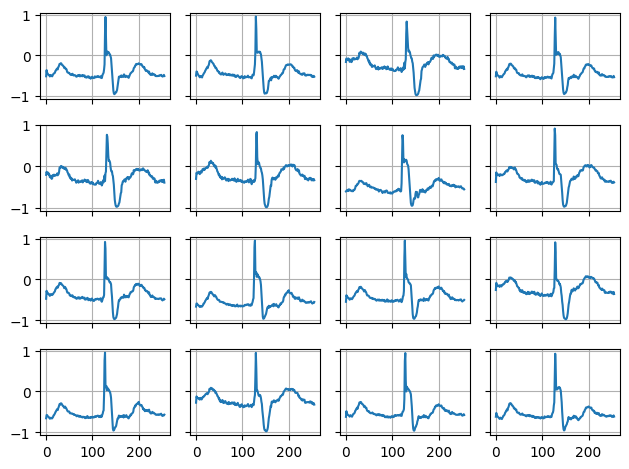


rand_vect: [3454, 7779, 2447, 4079, 6104, 3000, 5191, 5976, 5931, 3022, 7042, 953, 1122, 6601, 3893, 833]


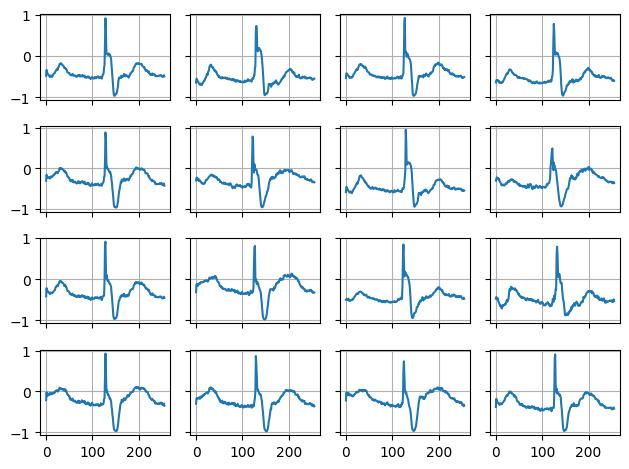


rand_vect: [9947, 1134, 2715, 4322, 5313, 6680, 3600, 8230, 525, 5048, 3591, 7234, 5476, 8159, 2948, 7549]


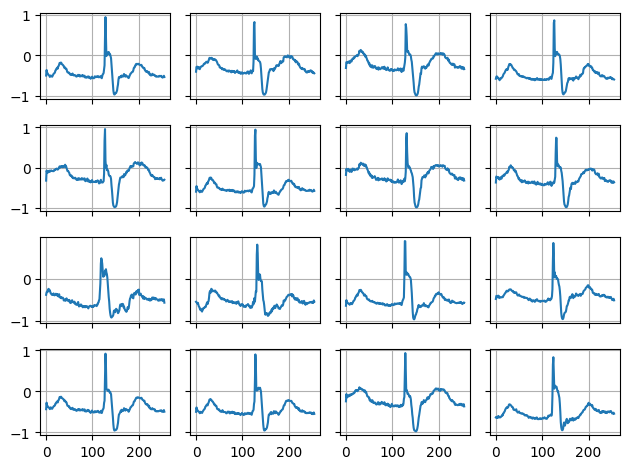


rand_vect: [5579, 2796, 6652, 4683, 6029, 1963, 9907, 6681, 5958, 9316, 2720, 2522, 5233, 9362, 4658, 7021]


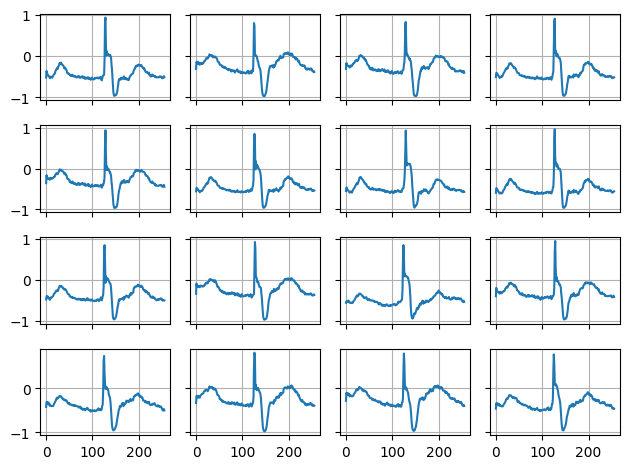


rand_vect: [2453, 7560, 212, 7225, 8514, 7946, 56, 5493, 8172, 2869, 2028, 2695, 216, 3108, 3724, 1945]


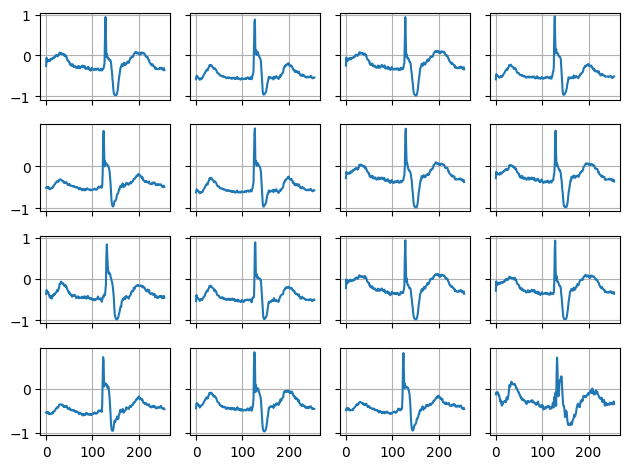


rand_vect: [3597, 2960, 5642, 4353, 4195, 368, 9837, 1862, 9080, 8858, 1046, 7806, 1531, 5890, 4716, 8348]


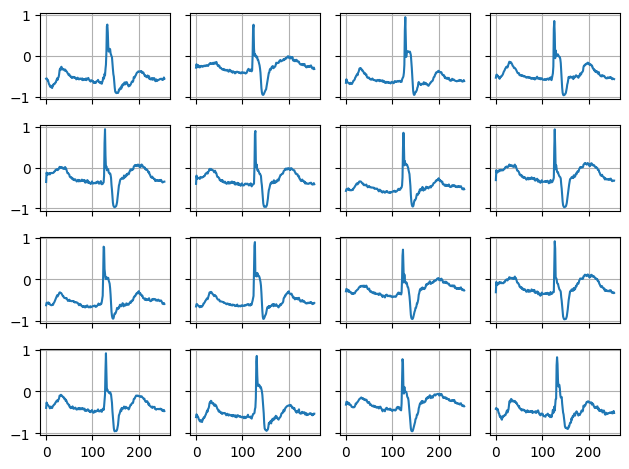


rand_vect: [5450, 5535, 3658, 5403, 369, 5572, 6076, 5687, 456, 1217, 1704, 1026, 9791, 2382, 7512, 9993]


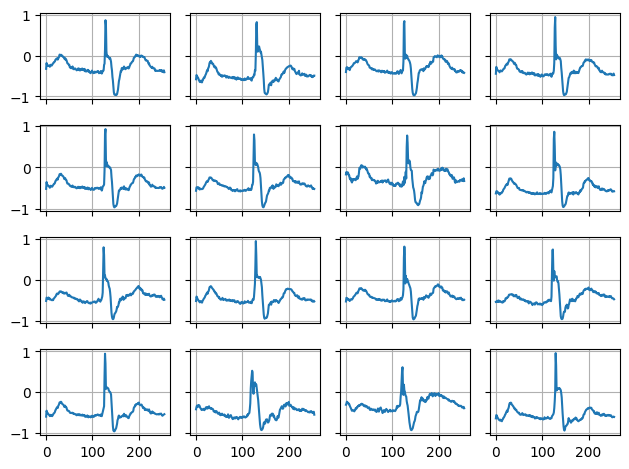


rand_vect: [7906, 7688, 8581, 1020, 4136, 3200, 6653, 8514, 2071, 6420, 3708, 6495, 7787, 2588, 9634, 7268]


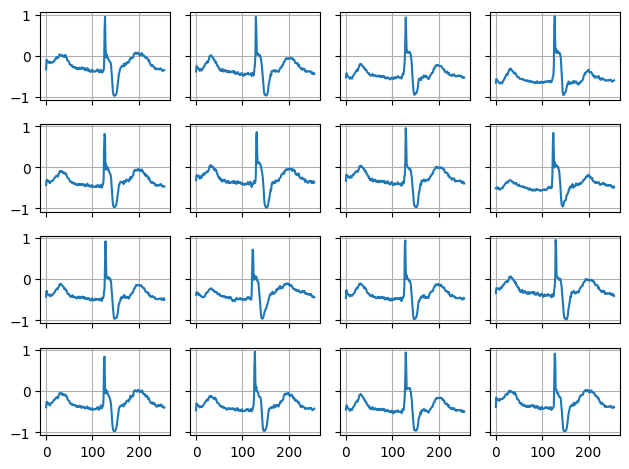


rand_vect: [8700, 3784, 6138, 7186, 3376, 2820, 9577, 8544, 3699, 7375, 2390, 5934, 8264, 3809, 7642, 4331]


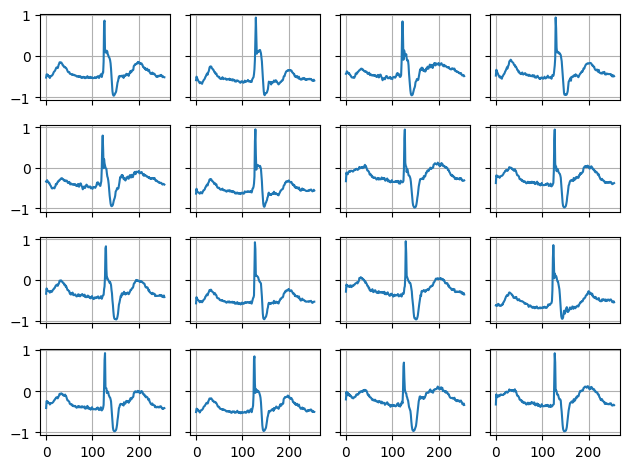


rand_vect: [5256, 1740, 4896, 5867, 1796, 3359, 4959, 3434, 832, 1841, 3654, 2587, 3543, 1118, 5011, 721]


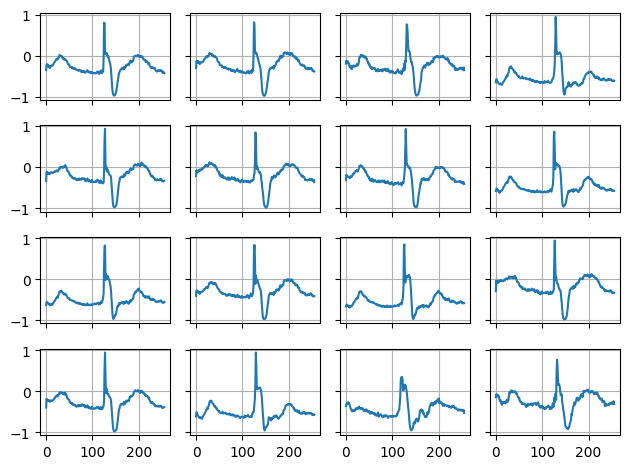

In [ ]:
#visualize beats

"""
visualizes beats, to check beats patterns visually
"""
import json
import os.path
import numpy as np
import torch
from matplotlib import pyplot as plt

from utils_ac_wgan_gp_ecg import grid_plot

classes2keep = ['N','/', 'A', 'L', 'R', 'f', 'j','F','a']
classes2keep_folder = ['N','P', 'A', 'L','R', 'f', 'j','F','a']
cl = classes2keep_folder[1]
#01_cond\screened/gb_P_cond_screened.json

#cond_key = "uncond"
cond_key = "cond"

screen_key = "screened"
#screen_key = "not_screened"
drive = ""
file_name = "gb_{}_cond_screened.json".format(cl)
file_name_template = "template_cl_{}.json".format(cl)
folder = ""
myPath_base = os.path.join(drive, "PycharmProjects\\paper2_gen_data\\", d_set, "multiclass", "01_{}\\{}".format(cond_key, screen_key))
myPath_read = os.path.join(myPath_base, folder)

#with open(os.path.join(myPath_base, "MIT_BIH\\templates", file_name_template), "r") as f:
    #templates_all = json.load(f)


with open(os.path.join(myPath_read, file_name), "r") as f:
    beats = json.load(f)
#grid_plot(4, 4, templates_all[:16])

# num of plots
num = 10

for idx in range(num):
    rand_vect = torch.randperm(len(beats))[:16]
    print(f"\nrand_vect: {rand_vect.tolist()}")
    signal = [beats[i] for i in rand_vect]
    grid_plot(4, 4, signal)
    plt.close()

#with open(os.path.join(myPath_read, file_name), "r") as f:
    #genbeats = json.load(f)

a = 0

In [ ]:
"""
Templates
Codes for: YT, "Pytorch Conditional GAN Tutorial" by Aladdin Persson
"""
import copy
import datetime
import json
import os
from collections import Counter
#from dtaidistance.dtw import distance as dtw
import matplotlib.pyplot as plt
import numpy as np
import torch
from ekg_class import dicts

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

num2descr, letter2num, letter2descr, num2letter = dicts()
start_time = datetime.datetime.now()
print(("\n" + "*" * 50 + "\n\t\tstart time:      {0:02d}:{1:02d}:{2:02.0f}\n" + "*" * 50).format(
    start_time.hour, start_time.minute, start_time.second))

drive = ""
myPath_base = os.path.join(drive, "")
myPath_dataset = os.path.join(myPath_base, "")


# Hyperparameters etc.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


BATCH_SIZE = 16
CHANNELS_IMG = 1
CRITIC_ITERATIONS = 5
FEATURES_DISC = 64
FEATURES_GEN = 64
GEN_EMBEDDING = 100
LAMBDA_GP = 10
LEARNING_RATE = 1e-4
NUM_EPOCHS = 20
Z_DIM = 100
ratio = 1  # train/test split ratio


with open(os.path.join(myPath_dataset, "record_X_y_adapt_win_bef075_aft075_Normalized.json"), "r") as f:
    data = json.load(f)
stats_all_classes = Counter(np.asarray(data, dtype=object)[:, 2])

all_classes = ['/', 'A', 'E', 'F', 'J', 'L', 'N', 'Q', 'R', 'S', 'V', 'a', 'e', 'f', 'j']
all_classes.remove('Q')
all_classes.remove('S')
# all_classes.remove('V')      # why remove this? plots show no-uniform pattern
# %%%%%%%%%%%%%%%%%    begin classes statistics      %%%%%%%%%%%%%%%%%%
"""
stats_all_classes =
        {
        'N': 75052,   'L': 8075,  'R': 7259,  'V': 7130,
        '/': 7028,    'A': 2546,  'f': 982,   'F': 803,
        'j': 229,     'a': 150,   'E': 106,   'J': 83,
        'Q': 33,      'e': 16,    'S': 2
        }
"""
# %%%%%%%%%%%%%%%%%    end classes statistics    %%%%%%%%%%%%%%%%%%%

# %%%%%%%%%%%%%%%%       begin MIT-BIH Dataset      %%%%%%%%%%%%%%%%%%%%%%%%%%%%

d_set = "MIT_BIH"
# Note: '/' and 'P' are the same

#classes2keep = ['/', 'A', 'L', 'N', 'R', 'f', 'j']
#classes2keep_folder = copy.copy(classes2keep)
classes2keep = ['N','/', 'A', 'L', 'R', 'f', 'j','F','a']
classes2keep_folder = ['N','P', 'A', 'L','R', 'f', 'j','F','a']


if '/' in classes2keep_folder:
    idx = classes2keep_folder.index('/')
    classes2keep_folder.pop(idx)
    classes2keep_folder.insert(idx, 'P')

NUM_CLASSES = len(classes2keep)
IMG_SIZE = 256

# create dictionary of data to be kept
vals = [[] for _ in range(len(classes2keep))]
data2keep_dict = dict(zip(classes2keep, vals))

for item in data:
    if item[2] in classes2keep:
        data2keep_dict[item[2]].append(item[1])
del data

if '/' in classes2keep:
    temp = data2keep_dict['/']
    data2keep_dict.pop('/')
    data2keep_dict['P'] = temp

myPath_save = os.path.join(myPath_base, "PyCharmProjects\\paper2_data", d_set, "templates")
os.makedirs(myPath_save, exist_ok=True)


# plot samples of beats in classes2keep

for cl in classes2keep_folder:
    fig, axes = plt.subplots(nrows=3, ncols=3)
    fig.suptitle("Class {} ({}: {}), count:{}".
                 format(classes2keep_folder.index(cl), cl, letter2descr[cl], len(data2keep_dict[cl])))

    count = 0
    for i in range(3):
        for j in range(3):
            count += 1
            if count >= len(data2keep_dict[cl]):
                continue
            axes[i][j].plot(data2keep_dict[cl][count])
            axes[i][j].grid()
    plt.savefig(os.path.join(myPath_save, "00_sample_cl{}".format(classes2keep_folder.index(cl))))

plt.close("all")


# recall: classes2keep = ['/', 'A', 'L', 'N', 'R', 'f', 'j']
cl = "a"
template_folder = "templates"
f_name = "templates_{}_.json".format(cl)
num_templates = 50

templates_all = data2keep_dict[cl]
# %%%%%%%%%%%%%%%%%%%%%%%%% begin save templates %%%%%%%%%%%%%%%%%%%%%%%
templates = templates_all[:num_templates]

with open((os.path.join(myPath_save, f_name)), "w") as f:
    json.dump(templates, f)
a = 0
"""
# %%%%%%%%%%%%%%%%%%%%%%%%% end save templates %%%%%%%%%%%%%%%%%%%%%%%

# %%%%%%%%%%%%%%%%%%%%%%%%% begin filter templates %%%%%%%%%%%%%%%%%%%%%%%

# templates are screened here based on their distance from a visually selected template
# which seemed similar to this:

# https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-topic-reviews-and-criteria/premature-ventricular-contractions-review
threshold = 2
f_name = "template_{}_screened.json".format(cl)
os.makedirs(os.path.join(path_class, template_folder), exist_ok=True)
templates_screened = []
for idx, item in enumerate(templates_all):
    if dtw(template, item) <= threshold:
        templates_screened.append(item)

with open((os.path.join(path_class, template_folder, f_name)), "w") as f:
    json.dump(templates_screened, f)
"""




**************************************************
		start time:      21:51:14
**************************************************


'\n# %%%%%%%%%%%%%%%%%%%%%%%%% end save templates %%%%%%%%%%%%%%%%%%%%%%%\n\n# %%%%%%%%%%%%%%%%%%%%%%%%% begin filter templates %%%%%%%%%%%%%%%%%%%%%%%\n\n# templates are screened here based on their distance from a visually selected template\n# which seemed similar to this:\n\n# https://www.healio.com/cardiology/learn-the-heart/ecg-review/ecg-topic-reviews-and-criteria/premature-ventricular-contractions-review\nthreshold = 2\nf_name = "template_{}_screened.json".format(cl)\nos.makedirs(os.path.join(path_class, template_folder), exist_ok=True)\ntemplates_screened = []\nfor idx, item in enumerate(templates_all):\n    if dtw(template, item) <= threshold:\n        templates_screened.append(item)\n\nwith open((os.path.join(path_class, template_folder, f_name)), "w") as f:\n    json.dump(templates_screened, f)\n'

In [ ]:
#data_rl_dict.json
import copy
import datetime
import json
import os
from collections import Counter
#from dtaidistance.dtw import distance as dtw
import matplotlib.pyplot as plt
import numpy as np
import torch
from ekg_class import dicts

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

num2descr, letter2num, letter2descr, num2letter = dicts()
start_time = datetime.datetime.now()
print(("\n" + "*" * 50 + "\n\t\tstart time:      {0:02d}:{1:02d}:{2:02.0f}\n" + "*" * 50).format(
    start_time.hour, start_time.minute, start_time.second))

drive = ""
myPath_base = os.path.join(drive, "")
myPath_dataset = os.path.join(myPath_base, "")


# Hyperparameters etc.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


BATCH_SIZE = 16
CHANNELS_IMG = 1
CRITIC_ITERATIONS = 5
FEATURES_DISC = 64
FEATURES_GEN = 64
GEN_EMBEDDING = 100
LAMBDA_GP = 10
LEARNING_RATE = 1e-4
NUM_EPOCHS = 20
Z_DIM = 100
ratio = 1  # train/test split ratio


with open(os.path.join(myPath_dataset, "record_X_y_adapt_win_bef075_aft075_Normalized.json"), "r") as f:
    data = json.load(f)
stats_all_classes = Counter(np.asarray(data, dtype=object)[:, 2])

all_classes = ['/', 'A', 'E', 'F', 'J', 'L', 'N', 'Q', 'R', 'S', 'V', 'a', 'e', 'f', 'j']
all_classes.remove('Q')
all_classes.remove('S')
# all_classes.remove('V')      # why remove this? plots show no-uniform pattern
# %%%%%%%%%%%%%%%%%    begin classes statistics      %%%%%%%%%%%%%%%%%%
"""
stats_all_classes =
        {
        'N': 75052,   'L': 8075,  'R': 7259,  'V': 7130,
        '/': 7028,    'A': 2546,  'f': 982,   'F': 803,
        'j': 229,     'a': 150,   'E': 106,   'J': 83,
        'Q': 33,      'e': 16,    'S': 2
        }
"""
# %%%%%%%%%%%%%%%%%    end classes statistics    %%%%%%%%%%%%%%%%%%%

# %%%%%%%%%%%%%%%%       begin MIT-BIH Dataset      %%%%%%%%%%%%%%%%%%%%%%%%%%%%

d_set = "MIT_BIH"
# Note: '/' and 'P' are the same

classes2keep = ['N','/', 'A', 'L', 'R', 'f', 'j','F','a']
classes2keep_folder = ['N','P', 'A', 'L','R', 'f', 'j','F','a']
classes2keep_folder = copy.copy(classes2keep)

if '/' in classes2keep_folder:
    idx = classes2keep_folder.index('/')
    classes2keep_folder.pop(idx)
    classes2keep_folder.insert(idx, 'P')

NUM_CLASSES = len(classes2keep)
IMG_SIZE = 256

# create dictionary of data to be kept
vals = [[] for _ in range(len(classes2keep))]
data2keep_dict = dict(zip(classes2keep, vals))

for item in data:
    if item[2] in classes2keep:
        data2keep_dict[item[2]].append(item[1])
del data

if '/' in classes2keep:
    temp = data2keep_dict['/']
    data2keep_dict.pop('/')
    data2keep_dict['P'] = temp

myPath_save = os.path.join(myPath_base, "PyCharmProjects\\paper2_data", d_set, "data_rl")
os.makedirs(myPath_save, exist_ok=True)

# recall: classes2keep = ['/', 'A', 'L', 'N', 'R', 'f', 'j']
cl = "P"
template_folder = "templates"
f_name = "data_rl_dict.json"
num_templates = 50

#print(data2keep_dict)

templates_all = data2keep_dict[cl]
# %%%%%%%%%%%%%%%%%%%%%%%%% begin save templates %%%%%%%%%%%%%%%%%%%%%%%
templates = templates_all[:num_templates]

with open((os.path.join(myPath_save, f_name)), "w") as f:
    json.dump(data2keep_dict, f)
a = 0





**************************************************
		start time:      07:00:03
**************************************************


In [ ]:
pip install similaritymeasures

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for similaritymeasures: filename=similaritymeasures-0.7.0-py3-none-any.whl size=15452 sha256=fbb24080e1c9685c3ae7edde61abfb38ba45f63de7b3cab795ac32b2c78c95bc
  Stored in directory: /root/.cache/pip/wheels/24/a6/80/6f1676caf08ab1b69d74c8a727c96fdd3903d891672b415008
Successfully built similaritymeasures


In [ ]:
pip install dtaidistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.7 MB/s eta 0:00:00


In [ ]:
"""
this file:
    *) uploads the trained generator (Cond. & Uncond. GAN models)
    *) generates beats (genbeats)
    *) produces sample plots
    *) screens genbeats (using DTW distance function, a template and a threshold)
"""
import copy
import datetime
import json
import os
import torch
from matplotlib import pyplot as plt
from model_ac_wgan_gp_ecg import Gen_ac_wgan_gp_1d
from model_wgan_gp_ecg import Gen_dcgan_gp_1d
import numpy as np
from collections import Counter
from utils_wgan_gp_ecg import grid_plot_save
from similaritymeasures import frechet_dist as frechet
from dtaidistance.dtw import distance as dtw

start_time = datetime.datetime.now()
print(("\n" + "*" * 50 + "\n\t\tstart time:      {0:02d}:{1:02d}:{2:02.0f}\n" + "*" * 50).format(
    start_time.hour, start_time.minute, start_time.second))

#classes2keep = ['/', 'A', 'L', 'N', 'R', 'f', 'j']
#classes2keep_folder = ['P', 'A', 'L', 'N', 'R', 'f', 'j']
classes2keep = ['N','/', 'A', 'L', 'R', 'f', 'j','F','a']
classes2keep_folder = ['N','P', 'A', 'L','R', 'f', 'j','F','a']

cl = 'a'        # for uncond. and cond


print("\nClass:                   {}".format(classes2keep))
print("Class (folder names):    {}\n".format(classes2keep_folder))

# %%%%%%%%%%%%% Cond/Uncond & Screened/Unscreened keys %%%%%%%%%%%%%%%%%%%%%%
# cond_key = "uncond"
cond_key = "cond"

#screen_key = "screened"
screen_key = "not_screened"

drive = ""
d_set="MIT_BIH"
myPath_base = os.path.join(drive, "")
#PycharmProjects\paper2_gen_data\/MIT_BIH/multiclass

# unconditional GAN
# myPath_read = os.path.join(myPath_base, "01_{}\\generators_trained_uncond".format(cond_key))

# conditional GAN

myPath_read = os.path.join(myPath_base, "PycharmProjects\\paper2_gen_data\\", d_set, "multiclass",
                            "genbeats_ac_wgan_gp_cl_{}_len_ratio_1".format(classes2keep_folder))
#myPath_read = os.path.join(myPath_base, "\multiclass\\genbeats_ac_wgan_gp_{}_len_ratio_1".format(classes2keep_folder))


myPath_template = os.path.join(myPath_base, "PyCharmProjects\\paper2_data", d_set, "templates")

# for uncond
# file_name_read = "generator_trained_cl_{}.pt".format(cl)
file_name_save = "gb_{}_{}_{}.json".format(cl, cond_key, screen_key)

# for cond
file_name_read = "generator_trained.pt"

# for Unconditional GAN
Z_DIM = 100
CHANNELS_IMG = 1
FEATURES_GEN = 64
BATCH_SIZE = 16

# for cond. GAN
IMG_SIZE = 256
NUM_CLASSES = len(classes2keep)
GEN_EMBEDDING = 100

n_rows = 4
n_cols = 4

myPath_save = os.path.join(myPath_base,"PycharmProjects\\paper2_gen_data\\", d_set, "multiclass", "01_{}\\{}".format(cond_key, screen_key))
os.makedirs(myPath_save, exist_ok=True)
# %%%%%%%%%%%%%%%%%%    load model  %%%%%%%%%%%%%%%%%%%%%%%%
# Unconditional GAN
# model = Gen_dcgan_gp_1d(Z_DIM, CHANNELS_IMG, FEATURES_GEN)  # for uncond. GAN

# Conditional GAN
model = Gen_ac_wgan_gp_1d(Z_DIM, CHANNELS_IMG, FEATURES_GEN, NUM_CLASSES, IMG_SIZE, GEN_EMBEDDING)

model.load_state_dict(torch.load(os.path.join(myPath_read, file_name_read)))
model.eval()

# read templates
vals = [[] for _ in range(len(classes2keep_folder))]

templates_dict = dict(zip(classes2keep_folder, vals))

for cl_idx in classes2keep_folder:
    file_name_template = "templates_{}_.json".format(cl_idx)
    with open(os.path.join(myPath_template, file_name_template)) as f:
        templates_dict[cl_idx] = json.load(f)

num_genbeats = 5000
count = 0
threshold = 2  # 2 for all class, 5 for class L, 2.3 for R
# _2 (additional genbeats) files use a different template and lower threshold
# threshold for class f & j reduced from 2 to 1.5

print("\n" + "%" * 25 + "\tclass: {}\t".format(cl) + "%" * 25)
labels = torch.tensor([classes2keep_folder.index(cl) for _ in range(16)])

# for uncond
template = templates_dict[cl][44]

genbeats = []
while len(genbeats) <= num_genbeats:
    noise = torch.randn((BATCH_SIZE, Z_DIM, 1))         # for uncond. & cond. GAN

    # %%%%%%%%% for uncond. GAN & screened genbeats
    # screened = [model(noise).squeeze().tolist()[i] for i in range(16)
    #            if dtw(model(noise).squeeze().tolist()[i], template) <= threshold]

    # %%%%%%%%% for uncond. GAN & not screened genbeats
    # screened = [model(noise).squeeze().tolist()[i] for i in range(16)]

    # %%%%%%%%  for cond. GAN
    output = model(noise, labels).squeeze().tolist()
    # grid_plot(4, 4, output)
    #screened = [output[i] for i in range(16) if dtw(output[i], template) <= threshold]
    screened = [output[i] for i in range(16)]

    if len(screened) != 0:
        genbeats.extend(screened)
        count += 1
        if count % 200 == 0:
            now = datetime.datetime.now()
            print("{0:02d}:{1:02d}:{2:02.0f}".format(now.hour, now.minute, now.second), end=" ")
            print("\t\tcount: {:4d}, \t\tnum. of genbeats: {:5d}".format(count, len(genbeats)))

# for uncond & cond
with open(os.path.join(myPath_save, file_name_save), "w") as f:
    json.dump(genbeats, f)

a = 0

print("\nlength of genbeats: {}".format(len(genbeats)))

finish_time = datetime.datetime.now()
print(("\n\n" + "finish time = {0:02d}:{1:02d}:{2:02.0f}").format(
    finish_time.hour, finish_time.minute, finish_time.second))

laps = finish_time - start_time
tot_sec = laps.total_seconds()
h = int(tot_sec // 3600)
m = int((tot_sec % 3600) // 60)
s = int(tot_sec - (h * 3600 + m * 60))

print("total elapsed time = {:02d}:{:2d}:{:2d}".format(h, m, s))
print("total elapsed time (seconds) = {}".format(laps.total_seconds()))
#/PycharmProjects\paper2_gen_data\/MIT_BIH/multiclass



**************************************************
		start time:      02:57:47
**************************************************

Class:                   ['N', '/', 'A', 'L', 'R', 'f', 'j', 'F', 'a']
Class (folder names):    ['N', 'P', 'A', 'L', 'R', 'f', 'j', 'F', 'a']


%%%%%%%%%%%%%%%%%%%%%%%%%	class: a	%%%%%%%%%%%%%%%%%%%%%%%%%
02:57:56 		count:  200, 		num. of genbeats:  3200

length of genbeats: 5008


finish time = 02:58:02
total elapsed time = 00: 0:14
total elapsed time (seconds) = 14.448091


In [ ]:
import copy
import datetime
import json
import os
import torch
from matplotlib import pyplot as plt
from model_ac_wgan_gp_ecg import Gen_ac_wgan_gp_1d
from model_wgan_gp_ecg import Gen_dcgan_gp_1d
import numpy as np
from collections import Counter
from utils_wgan_gp_ecg import grid_plot_save
from similaritymeasures import frechet_dist as frechet
from dtaidistance.dtw import distance as dtw

start_time = datetime.datetime.now()
print(("\n" + "*" * 50 + "\n\t\tstart time:      {0:02d}:{1:02d}:{2:02.0f}\n" + "*" * 50).format(
    start_time.hour, start_time.minute, start_time.second))

#classes2keep = ['/', 'A', 'L', 'N', 'R', 'f', 'j']
#classes2keep_folder = ['P', 'A', 'L', 'N', 'R', 'f', 'j']
classes2keep = ['N','/', 'A', 'L', 'R', 'f', 'j','F','a']
classes2keep_folder = ['N','P', 'A', 'L','R', 'f', 'j','F','a']

cl = 'N'        # for uncond. and cond


print("\nClass:                   {}".format(classes2keep))
print("Class (folder names):    {}\n".format(classes2keep_folder))

# %%%%%%%%%%%%% Cond/Uncond & Screened/Unscreened keys %%%%%%%%%%%%%%%%%%%%%%
# cond_key = "uncond"
cond_key = "cond"

screen_key = "screened"
#screen_key = "not_screened"

drive = ""
d_set="MIT_BIH"
myPath_base = os.path.join(drive, "")
#PycharmProjects\paper2_gen_data\/MIT_BIH/multiclass

# unconditional GAN
# myPath_read = os.path.join(myPath_base, "01_{}\\generators_trained_uncond".format(cond_key))

# conditional GAN

myPath_read = os.path.join(myPath_base, "PycharmProjects\\paper2_gen_data\\", d_set, "multiclass",
                            "genbeats_ac_wgan_gp_cl_{}_len_ratio_1".format(classes2keep_folder))
#myPath_read = os.path.join(myPath_base, "\multiclass\\genbeats_ac_wgan_gp_{}_len_ratio_1".format(classes2keep_folder))


myPath_template = os.path.join(myPath_base, "PyCharmProjects\\paper2_data", d_set, "templates")
#PyCharmProjects_paper2_data/MIT_BIH/templates/templates
# for uncond
# file_name_read = "generator_trained_cl_{}.pt".format(cl)
file_name_save = "gb_{}_{}_{}.json".format(cl, cond_key, screen_key)

# for cond
file_name_read = "generator_trained.pt"

# for Unconditional GAN
Z_DIM = 100
CHANNELS_IMG = 1
FEATURES_GEN = 64
BATCH_SIZE = 16

# for cond. GAN
IMG_SIZE = 256
NUM_CLASSES = len(classes2keep)
GEN_EMBEDDING = 100

n_rows = 4
n_cols = 4

myPath_save = os.path.join(myPath_base,"PycharmProjects\\paper2_gen_data\\", d_set, "multiclass", "01_{}\\{}".format(cond_key, screen_key))
os.makedirs(myPath_save, exist_ok=True)
# %%%%%%%%%%%%%%%%%%    load model  %%%%%%%%%%%%%%%%%%%%%%%%
# Unconditional GAN
# model = Gen_dcgan_gp_1d(Z_DIM, CHANNELS_IMG, FEATURES_GEN)  # for uncond. GAN

# Conditional GAN
model = Gen_ac_wgan_gp_1d(Z_DIM, CHANNELS_IMG, FEATURES_GEN, NUM_CLASSES, IMG_SIZE, GEN_EMBEDDING)

model.load_state_dict(torch.load(os.path.join(myPath_read, file_name_read)))
model.eval()

# read templates
vals = [[] for _ in range(len(classes2keep_folder))]

templates_dict = dict(zip(classes2keep_folder, vals))

for cl_idx in classes2keep_folder:
    file_name_template = "templates_{}_.json".format(cl_idx)
    with open(os.path.join(myPath_template, file_name_template)) as f:
        templates_dict[cl_idx] = json.load(f)

num_genbeats = 10000
count = 0
threshold = 2  # 2 for all class, 5 for class L, 2.3 for R
# _2 (additional genbeats) files use a different template and lower threshold
# threshold for class f & j reduced from 2 to 1.5

print("\n" + "%" * 25 + "\tclass: {}\t".format(cl) + "%" * 25)
labels = torch.tensor([classes2keep_folder.index(cl) for _ in range(16)])

# for uncond
template = templates_dict[cl][6]

existing_ganbeats_file = os.path.join(myPath_save, file_name_save)  # Replace with the path to the previously generated ganbeats file
genbeats = []

# Load the previously generated ganbeats
with open(existing_ganbeats_file, 'r') as f:
    existing_ganbeats = json.load(f)
    genbeats.extend(existing_ganbeats)


while len(genbeats) < num_genbeats:
    noise = torch.randn((BATCH_SIZE, Z_DIM, 1))  # for uncond. & cond. GAN

    # %%%%%%%%% for uncond. GAN & screened genbeats
    # screened = [model(noise).squeeze().tolist()[i] for i in range(16)
    #            if dtw(model(noise).squeeze().tolist()[i], template) <= threshold]

    # %%%%%%%%% for uncond. GAN & not screened genbeats
    # screened = [model(noise).squeeze().tolist()[i] for i in range(16)]

    # %%%%%%%%  for cond. GAN
    output = model(noise, labels).squeeze().tolist()
    # grid_plot(4, 4, output)
    screened = [output[i] for i in range(16) if dtw(output[i], template) <= threshold]
    #screened = [output[i] for i in range(16)]


    if len(screened) != 0:
        genbeats.extend(screened)
        count += 1
        if count % 200 == 0:
            now = datetime.datetime.now()
            print("{0:02d}:{1:02d}:{2:02.0f}".format(now.hour, now.minute, now.second), end=" ")
            print("\t\tcount: {:4d}, \t\tnum. of genbeats: {:5d}".format(count, len(genbeats)))

# Append the generated beats to the existing file
with open(existing_ganbeats_file, "w") as f:
    json.dump(genbeats, f)
    f.write('\n')  # Add a new line after appending the beats

a = 0

print("\nlength of genbeats: {}".format(len(genbeats)))

finish_time = datetime.datetime.now()
print(("\n\n" + "finish time = {0:02d}:{1:02d}:{2:02.0f}").format(
    finish_time.hour, finish_time.minute, finish_time.second))

laps = finish_time - start_time
tot_sec = laps.total_seconds()
h = int(tot_sec // 3600)
m = int((tot_sec % 3600) // 60)
s = int(tot_sec - (h * 3600 + m * 60))

print("total elapsed time = {:02d}:{:2d}:{:2d}".format(h, m, s))
print("total elapsed time (seconds) = {}".format(laps.total_seconds()))


**************************************************
		start time:      16:11:45
**************************************************

Class:                   ['N', '/', 'A', 'L', 'R', 'f', 'j', 'F', 'a']
Class (folder names):    ['N', 'P', 'A', 'L', 'R', 'f', 'j', 'F', 'a']


%%%%%%%%%%%%%%%%%%%%%%%%%	class: N	%%%%%%%%%%%%%%%%%%%%%%%%%

length of genbeats: 10012


finish time = 16:11:52
total elapsed time = 00: 0: 7
total elapsed time (seconds) = 7.223266



rand_vect: [28, 20, 27, 12, 21, 33, 38, 42, 16, 18, 48, 43, 11, 46, 17, 26]


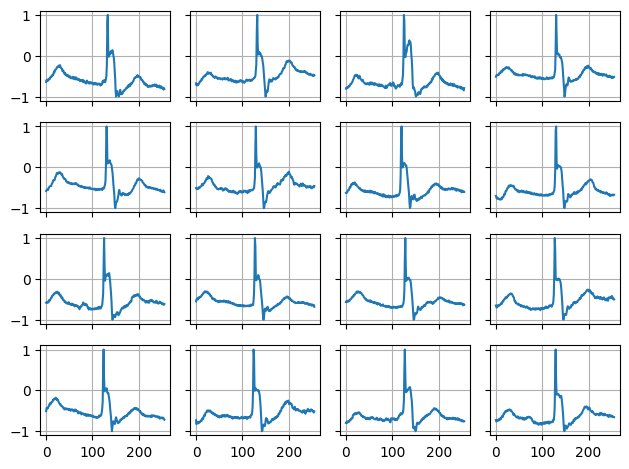


rand_vect: [1, 39, 8, 42, 20, 15, 23, 25, 31, 19, 12, 33, 36, 9, 30, 4]


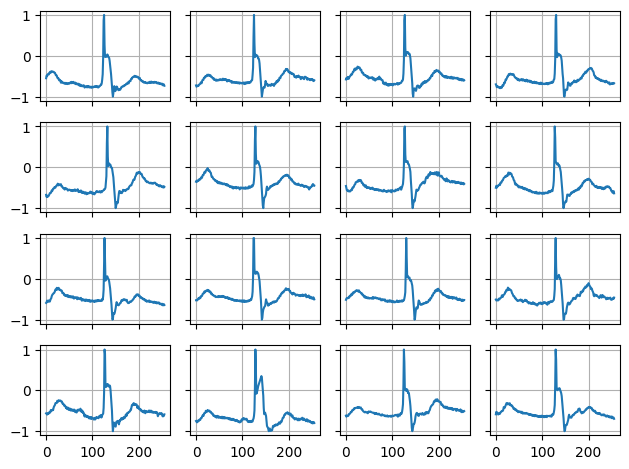


rand_vect: [3, 1, 0, 29, 31, 35, 23, 42, 5, 39, 41, 43, 17, 46, 24, 8]


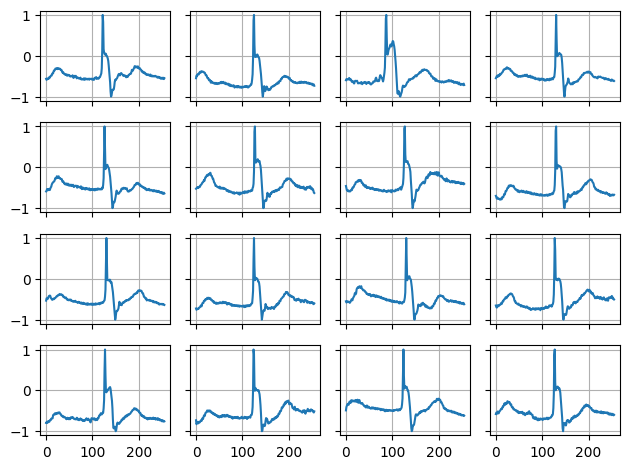


rand_vect: [10, 24, 27, 45, 32, 35, 6, 29, 30, 48, 46, 14, 7, 0, 43, 15]


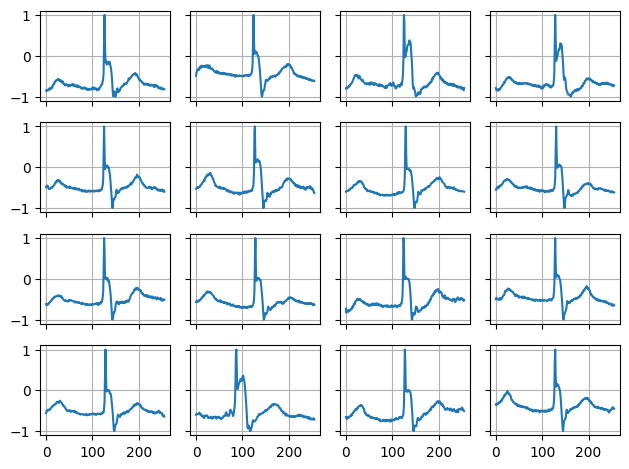


rand_vect: [2, 21, 31, 23, 24, 25, 6, 18, 30, 15, 43, 4, 38, 0, 19, 12]


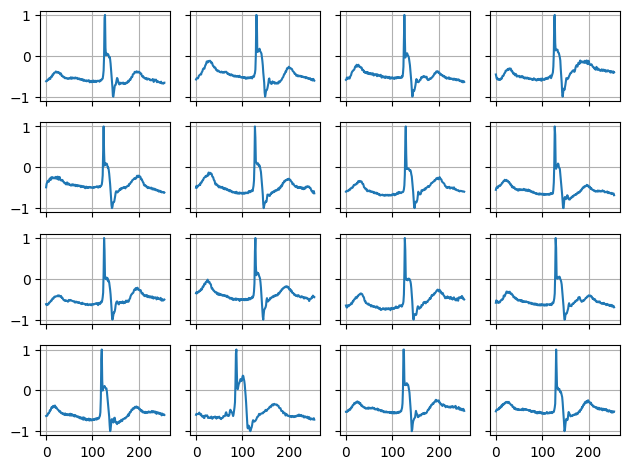

In [ ]:
#visualize beats

"""
visualizes beats, to check beats patterns visually
"""
import json
import os.path
import numpy as np
import torch
from matplotlib import pyplot as plt

from utils_ac_wgan_gp_ecg import grid_plot

classes = ['P', 'A', 'L', 'N', 'R', 'f', 'j','a']
cl = classes[0]
#01_cond\screened/gb_P_cond_screened.json


drive = ""
file_name = "gb_{}_cond_screened.json".format(cl)
file_name_template = "templates_{}_.json".format(cl)
folder = "01_cond\screened"
myPath_base_template = os.path.join(drive, "PyCharmProjects\\paper2_data", d_set, "templates")

myPath_base = os.path.join(drive, "PycharmProjects\\paper2_gen_data\\", d_set, "multiclass")
myPath_read = os.path.join(myPath_base, folder)

with open(os.path.join(myPath_base_template, file_name_template), "r") as f:
    templates_all = json.load(f)


#with open(os.path.join(myPath_read, file_name), "r") as f:
    #beats = json.load(f)
#grid_plot(4, 4, templates_all[:16])

# num of plots
num = 5

for idx in range(num):
    rand_vect = torch.randperm(len(templates_all))[:16]
    print(f"\nrand_vect: {rand_vect.tolist()}")
    signal = [templates_all[i] for i in rand_vect]
    grid_plot(4, 4, signal)
    plt.close()

#with open(os.path.join(myPath_read, file_name), "r") as f:
    #genbeats = json.load(f)

a = 0
#PyCharmProjects\paper2_data/MIT_BIH/templates/templates_j_.json

In [ ]:
#splitting into training and testing
import json
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
from datetime import datetime
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc
import csv
from torchvision import datasets
import torchvision.transforms as transforms
from collections import Counter
import gc
import copy

from tqdm import tqdm

from ekg_class import dicts
import torch.nn as nn
from models_classifier import EcgResNet34
from sklearn.metrics import classification_report as report
from sklearn.metrics import confusion_matrix as cf_matrix
from utils import print_confusion_matrix

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

num2descr, letter2num, letter2descr, num2letter = dicts()
start_time = datetime.now()

print(("\n" + "*" * 61 + "\n\t\t\t\t\tstart time  {0:02d}:{1:02d}:{2:02.0f}\n" + "*" * 61).format(
    start_time.hour, start_time.minute, start_time.second))

drive = ""
myPath_base = os.path.join(drive, "")
path_aux = 'paper3_DM\\paper3_data'
myPath_base = os.path.join(myPath_base, '')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyper-parameters etc.
dry_run = False
BATCH_SIZE = 16
LEARNING_RATE = 1e-3
NUM_CLASSES = 9
tr_ts_ratio = 0.9     # "training set / test set" split ratio
len_ratio = 1

if dry_run:
    NUM_EPOCHS = 1
else:
    NUM_EPOCHS = 10
#classes2keep = ['/', 'A', 'L', 'N', 'R', 'f', 'j']
#classes2keep_folder = ['P', 'A', 'L', 'N', 'R', 'f', 'j']

classes2keep = ['N','/', 'A', 'L', 'R', 'f', 'j','F','a']
classes2keep_folder = ['N','P', 'A', 'L','R', 'f', 'j','F','a']


#key_aug = "aug"
key_aug = "notaug";

#key_bal = 'balanced'
key_bal = 'imbalanced';

# key_case = 'rl'
# key_case = "02"
key_case = "wgan"

len_ratio = 0.5                   # shorter train sets
#len_ratio = 1                  # shorter train sets
num_samples = 8000
tst_len = 1000
print('\ncase: {}, {}, {}\n'.format(key_case, key_bal, key_aug))
# num_N_samples = int(len_ratio*num_samples)

if '.' in str(len_ratio):
    len_ratio_str = str(len_ratio).replace('.', '')
else:
    len_ratio_str = str(len_ratio)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
path = "gb_dm_case_{}".format(key_case)
myPath_save = os.path.join(myPath_base, path)
os.makedirs(myPath_save, exist_ok=True)

brk = 'here'

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%   begin: From whole database select training and testing set   %%%%%%%%%%%%%%%%%%


d_set = "MIT_BIH/tesing"
myPath_save = os.path.join(myPath_base, "PycharmProjects\\paper2_gen_data\\", d_set,"classifier_wgan_gp_cl_{}_{}".format(classes2keep_folder,len_ratio))
os.makedirs(myPath_save, exist_ok=True)


# %%%%%%%%%%%%%%%%       begin MIT-BIH Dataset      %%%%%%%%%%%%%%%%%%%%%%%%%%%%

with open(os.path.join(myPath_base, "record_X_y_adapt_win_bef075_aft075_Normalized.json"), "r") as f:
    data = json.load(f)

stats_all_classes = Counter(np.asarray(data, dtype=object)[:, 2])

# create dictionary of data to be kept
vals = []
for idx in range(len(classes2keep)):
    vals.append([])

data2keep_dict = dict(zip(classes2keep, vals))
data_train_dict = copy.deepcopy(data2keep_dict)
data_test_dict = copy.deepcopy(data2keep_dict)

for item in data:
    if item[2] in classes2keep:
        data2keep_dict[item[2]].append(item[1])
del data

# randomly splitting the dataset into train and test sets
for key in data2keep_dict.keys():
    val_len = len(data2keep_dict[key])
    idx_train = torch.randperm(val_len)[:int(tr_ts_ratio * val_len)]
    idx_test = torch.randperm(val_len)[int(tr_ts_ratio * val_len)+1:]
    data_train_dict[key] = [data2keep_dict[key][idx] for idx in idx_train]
    data_test_dict[key] = [data2keep_dict[key][idx] for idx in idx_test]

if '/' in classes2keep:
    temp = data2keep_dict['/']
    data2keep_dict.pop('/')
    data2keep_dict['P'] = temp

    temp = data_train_dict['/']
    data_train_dict.pop('/')
    data_train_dict['P'] = temp

    temp = data_test_dict['/']
    data_test_dict.pop('/')
    data_test_dict['P'] = temp


# create X, y for train and test sets
X_train = []
y_train = []
for key in data_train_dict.keys():
    X_train.extend(data_train_dict[key])
    idx = [classes2keep_folder.index(key)] * len(data_train_dict[key])
    y_train.extend(idx)

X_test = []
y_test = []
for key in data_test_dict.keys():
    X_test.extend(data_test_dict[key])
    idx = [classes2keep_folder.index(key)] * len(data_test_dict[key])
    y_test.extend(idx)

y_test_stat = Counter(y_test)
y_train_stat = Counter(y_train)

print("train: {}".format(y_train_stat))
print("test: {}".format(y_test_stat))

'''
#for shorter training set
for key in classes2keep_folder:
    temp = data_train_dict[key]
    length = int(len_ratio*len(temp))
    X_train.extend(temp[:length])
    idx = [classes2keep_folder.index(key)] * length
    # print('key {}, idx {}'.format(key, idx))
    y_train.extend(idx)

X_test = []
y_test = []
for key in classes2keep_folder:
    X_test.extend(data_test_dict[key][:])
    idx = [classes2keep_folder.index(key)] * len(data_test_dict[key])
    y_test.extend(idx)

y_test_stat = Counter(y_test)
y_train_stat = Counter(y_train)

print("train: {}".format(y_train_stat))
print("test: {}".format(y_test_stat))
a = 0
'''
'''
path = os.path.join(myPath_base, "X_N_trn.json")
with open(path, 'r') as f:
    X_N_trn = json.load(f)

path = os.path.join(myPath_base, "X_N_tst.json")
with open(path, 'r') as f:
    X_N_tst = json.load(f)

path = os.path.join(myPath_base, "X_L_trn.json")
with open(path, 'r') as f:
    X_L_trn = json.load(f)

path = os.path.join(myPath_base, "X_L_tst.json")
with open(path, 'r') as f:
    X_L_tst = json.load(f)
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  end: load X and y   %%%%%%%%%%%%%%%%%%
X_tst = X_N_tst + X_L_tst
y_N_tst = [0 for _ in range(len(X_N_tst))]
y_L_tst = [1 for _ in range(len(X_L_tst))]
y_tst = y_N_tst + y_L_tst

if key_aug == 'aug':
    with open(os.path.join(myPath_base, 'gb_dm_case_{}\\gb_dm_1d_case_{}.json'.format(key_case, key_case)), "r") as f:
        gb_for_aug = json.load(f)

    rand_idx = random.sample(range(0, len(gb_for_aug)), len(gb_for_aug))
    temp = [gb_for_aug[idx] for idx in rand_idx]
    X_aug = temp[:7000-350]
else:
    X_aug = []

# # imbalanced case N: 350, select 350 elements in X_N_trn if 'imbalanced' or 'augmented'
if key_bal == 'imbalanced' or key_aug == 'aug':
    rand_idx = random.sample(range(0, len(X_N_trn)), len(X_N_trn))[:350]
    X_N_trn = [X_N_trn[idx] for idx in rand_idx]

X_N_trn = X_N_trn + X_aug
X_trn = X_N_trn + X_L_trn

y_N_trn = [0 for _ in range(len(X_N_trn))]
y_L_trn = [1 for _ in range(len(X_L_trn))]
y_trn = y_N_trn + y_L_trn
'''
trn_set = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
tst_set = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))
trn_loader = DataLoader(trn_set, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)
tst_loader = DataLoader(tst_set, batch_size=BATCH_SIZE, shuffle=True, drop_last=True)

brk = 'here'
# %%%%%%%%%%%%%%%%%     begin save sample plots of classes in classes2keep    %%%%%%%%%%%%%%%%%%%%
'''
for cl in classes2keep:
    fig, axes = plt.subplots(nrows=3, ncols=3)
    fig.suptitle("Class {} ({}: {}), count: {}".
                 format(classes2keep.index(cl), cl, letter2descr[cl], len(data2keep_dict[cl])))

    count = 0
    for i in range(3):
        for j in range(3):
            count += 1
            if count >= len(data2keep_dict[cl]):
                continue
            axes[i][j].plot(data2keep_dict[cl][count])
            axes[i][j].grid()
    plt.savefig(os.path.join(myPath_save, "00_sample_cl_{}.png".format(classes2keep.index(cl))))

plt.close("all")
'''
# %%%%%%%%%%%%%%%%%     end save sample plots of classes in classes2keep      %%%%%%%%%%%%%%%%%%%%


# %%%%%%%%%%%%%%%%%%%% begin:     Select and Initialize Network       %%%%%%%%%%%%%%%%%%%%%%%%%%%%
# net = net_cnn(num_classes=NUM_CLASSES).to(device)
# net = net_fc(input_size=INPUT_SIZE, num_classes=NUM_CLASSES).to(device)
net = EcgResNet34(num_classes=NUM_CLASSES).to(device)

# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)
# %%%%%%%%%%%%%%%%%%%% end:     Select and Initialize Network       %%%%%%%%%%%%%%%%%%%%%%%%%%%%


NUM_EPOCHS = 10
# %%%%%%%%%%%%%%%%%%%%    begin:  Train Classifier       %%%%%%%%%%%%%%%%%%%%%%%%%%
for epoch in range(NUM_EPOCHS):
    for batch_idx, (inputs, labels) in enumerate(trn_loader, 0):
        inputs = inputs.to(device)
        labels = labels.to(device)
        inputs = inputs.reshape(inputs.shape[0], 1, -1)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        scores = net(inputs)
        loss = criterion(scores.squeeze(), labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print statistics
        # running_loss += loss.item()
        if batch_idx % 200 == 0:  # print every 200 mini-batches
            now = datetime.now()
            print('{:02d}:{:02d}:{:02d}\t\tepoch={:4d} / {:4d}\t\titer={:5d} / {:5d}\t\t\tloss: {:7.5f}'.
                  format(now.hour, now.minute, now.second, epoch, NUM_EPOCHS, batch_idx, len(trn_loader), loss))

print('\n\tFinished Training\n')
# %%%%%%%%%%%%%%%%%%%%    end  Train Network       %%%%%%%%%%%%%%%%%%%%%%%%%%%%


print('\tSaving model ...\n')

# %%%%%%%%%%%%%%%%%%%%    begin save model   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
f_name = "classifier_{}_{}_{}.pth".format(key_case, key_bal, key_aug)
PATH = os.path.join(myPath_save, f_name)
torch.save(net.state_dict(), PATH)
# %%%%%%%%%%%%%%%%%%%%    end save model     %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%




*************************************************************
					start time  14:53:55
*************************************************************

case: wgan, imbalanced, notaug

train: Counter({0: 67546, 3: 7267, 4: 6533, 1: 6325, 2: 2291, 5: 883, 7: 722, 6: 206, 8: 135})
test: Counter({0: 7505, 3: 807, 4: 725, 1: 702, 2: 254, 5: 98, 7: 80, 6: 22, 8: 14})
14:54:37		epoch=   0 /   10		iter=    0 /  5744			loss: 2.95598
14:55:01		epoch=   0 /   10		iter=  200 /  5744			loss: 1.57323
14:55:25		epoch=   0 /   10		iter=  400 /  5744			loss: 0.81507
14:55:49		epoch=   0 /   10		iter=  600 /  5744			loss: 0.74070
14:56:14		epoch=   0 /   10		iter=  800 /  5744			loss: 1.45908
14:56:40		epoch=   0 /   10		iter= 1000 /  5744			loss: 1.47757
14:57:06		epoch=   0 /   10		iter= 1200 /  5744			loss: 1.40059
14:57:31		epoch=   0 /   10		iter= 1400 /  5744			loss: 0.56442
14:57:57		epoch=   0 /   10		iter= 1600 /  5744			loss: 1.44918
14:58:23		epoch=   0 /   10		iter= 1800 /  5744			loss: 0.26

In [ ]:
path = "gb_dm_case_{}".format(key_case)
myPath = os.path.join(myPath_base, path)
classifier_name = "classifier_{}_{}_{}.pth".format(key_case, key_bal, key_aug)
net.load_state_dict(torch.load(os.path.join(myPath_save, classifier_name)))

brk = 'here'

# %%%%%%%%%%%%%%%%%%    print Classification Report to file      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
trntst = ['tst']
for key_trntst in trntst:
    print('Preparing Classification Report: {}'.format(key_trntst))

    y_scores = []
    y_true = []
    y_pred = []
    exec('loader = {}_loader'.format(key_trntst))
    for (inputs, labels) in tqdm(loader):
        inputs = inputs.reshape(inputs.shape[0], 1, -1).to(device)
        labels = labels.to(device)
        temp = net(inputs)
        output = temp.max(dim=1)

        y_true.extend(labels.data.tolist())
        y_pred.extend(output.indices.tolist())
        y_scores.extend((F.softmax(temp, dim=1).tolist()))


    from sklearn.metrics import classification_report



    print('\nClassification Report:')
    print(classification_report_str)

    # Calculate and print the accuracy with desired precision
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_str = "{:.5f}".format(accuracy)
    print("Accuracy: {}".format(accuracy_str))



In [ ]:
# %%%%%%%%%%%%%%%%%%%%    load trained classifier     %%%%%%%%%%%%%%%%%%%%%
path = "gb_dm_case_{}".format(key_case)
myPath = os.path.join(myPath_base, path)
classifier_name = "classifier_{}_{}_{}.pth".format(key_case, key_bal, key_aug)
net.load_state_dict(torch.load(os.path.join(myPath_save, classifier_name)))

brk = 'here'

# %%%%%%%%%%%%%%%%%%    print Classification Report to file      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%
trntst = ['tst']
for key_trntst in trntst:
    print('Preparing Classification Report: {}'.format(key_trntst))
    path = os.path.join(myPath_save, 'classification_report_{}_{}_{}_{}.txt'.
                        format(key_trntst, key_case, key_bal, key_aug))
    with open(path, 'w') as sys.stdout:
        y_scores = []
        y_true = []
        y_pred = []
        exec('loader = {}_loader'.format(key_trntst))
        for (inputs, labels) in tqdm(loader):
            inputs = inputs.reshape(inputs.shape[0], 1, -1).to(device)
            labels = labels.to(device)
            temp = net(inputs)
            output = temp.max(dim=1)

            y_true.extend(labels.data.tolist())
            y_pred.extend(output.indices.tolist())
            y_scores.extend((F.softmax(temp, dim=1).tolist()))

        print("\n")
        print("%" * 20 + "\tClassification Report ({} Set, {}, {}, {})\t".
              format(key_trntst, key_case, key_bal, key_aug) + "%" * 20)
        print("Classes:                             {}".format(classes2keep_folder))
        print("Classifier Model:                    {}".format(net._get_name()))
        print(f"number of epochs:                    {NUM_EPOCHS}\n")
        print("Train set length:                    {}".format(len(trn_set)))
        print("Test set length:                     {}".format(len(tst_set)))
        print("Train set reduction length ratio:    {}\t".format(len_ratio_str))
        print('\nClassification Report:')
        print(report(y_true, y_pred, target_names=classes2keep_folder))
        print("\nConfusion Matrix:\n {}".format(cf_matrix(y_true, y_pred)))
        """
        precision, recall, thresholds = precision_recall_curve(y_true, np.asarray(y_scores)[:, 1])
        #here auc function won't work as it works for binary classifier
        pr_recall_auc_score = auc(recall, precision)
        print('\nPrecision-Recall AUC Score:        {:6.4f}'.format(pr_recall_auc_score))
        rocauc_score = roc_auc_score(y_true, np.asarray(y_scores)[:, 1])
        print('\nROC AUC Score:                     {:6.4f}'.format(rocauc_score))

        print_confusion_matrix(cf_matrix(y_true, y_pred), class_names=classes2keep_folder,
                               fig_name="Conf. Matrix_{}_{}_{}_{}".format(key_trntst, key_case, key_bal, key_aug))
        plt.savefig(os.path.join(myPath_save, "cfmx_{}_{}_{}_{}.png".format(key_trntst, key_case, key_bal, key_aug)))
        plt.close("all")


        plt.plot(precision, recall)
        plt.title("Precision - Recall Curve ({}, {}, {}, {})".format(key_trntst, key_case, key_bal, key_aug))
        plt.grid()
        plt.savefig(os.path.join(myPath_save, "prec_recall_curve_{}_{}_{}_{}.png".
                                 format(key_trntst, key_case, key_bal, key_aug)))
        """
        plt.close("all")
        sys.stdout = sys.__stdout__


finish_time = datetime.now()
print(("\n\n\n" + "finish time = {0:02d}:{1:02d}:{2:02.0f}").format(
    finish_time.hour, finish_time.minute, finish_time.second))

laps = finish_time - start_time
tot_sec = laps.total_seconds()
h = int(tot_sec // 3600)
m = int((tot_sec % 3600) // 60)
s = int(tot_sec - (h * 3600 + m * 60))

print("total elapsed time = {:02d}:{:2d}:{:2d}".format(h, m, s))



  0%|          | 1/637 [00:00<01:41,  6.25it/s]

Preparing Classification Report: tst


100%|██████████| 637/637 [00:23<00:00, 27.35it/s]
